###  Hotel Booking Data

### PART 1

### Task 1:Data Cleaning

### Perform the necessary data cleaning steps to convert messy, unclean data into clean data

In [103]:
import pandas as pd

df = pd.read_csv('Hotel_Dataset.csv') # Load the dataset
df

hotel  is_canceled  lead_time  arrival_date_year  \
0     Resort Hotel            0         68               2015   
1     Resort Hotel            0         14               2015   
2     Resort Hotel            0         10               2015   
3     Resort Hotel            0          9               2015   
4     Resort Hotel            0         51               2015   
...            ...          ...        ...                ...   
2092    City Hotel            0         15               2017   
2093    City Hotel            0         83               2017   
2094    City Hotel            0        189               2017   
2095    City Hotel            0        147               2017   
2096    City Hotel            0        135               2017   

     arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                  July                        27                          1   
1                  July                        27                          2   
2                  July                        27                          3   
3                  July                        27                          3   
4                  July                        28                          6   
...                 ...                       ...                        ...   
2092             August                        34                         25   
2093             August                        35                         28   
2094             August                        35                         29   
2095             August                        35                         28   
2096             August                        35                         30   

      stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                           0                     4       2  ...   
1                           0                     2       2  ...   
2                           0                     2       2  ...   
3                           0                     1       2  ...   
4                           1                     3       2  ...   
...                       ...                   ...     ...  ...   
2092                        2                     2       2  ...   
2093                        1                     3       1  ...   
2094                        0                     3       2  ...   
2095                        1                     5       2  ...   
2096                        1                     4       2  ...   

      deposit_type  agent company days_in_waiting_list customer_type     adr  \
0       No Deposit  240.0     NaN                    0     Transient   97.00   
1       No Deposit  242.0     NaN                    0     Transient   98.00   
2       No Deposit  240.0     NaN                    0     Transient  153.00   
3       No Deposit  241.0     NaN                    0     Transient   94.71   
4       No Deposit  241.0     NaN                    0     Transient  117.81   
...            ...    ...     ...                  ...           ...     ...   
2092    No Deposit   14.0     NaN                    0     Transient  132.53   
2093    No Deposit   14.0     NaN                    0     Transient  147.68   
2094    No Deposit   42.0     NaN                    0     Transient   80.10   
2095    No Deposit   14.0     NaN                    0     Transient  117.00   
2096    No Deposit   14.0     NaN                    0     Transient  143.10   

      required_car_parking_spaces  total_of_special_requests  \
0                               0                          3   
1                               0                          1   
2                               1                          0   
3                               0                          0   
4                               1                          2   
...                           ...                        ...   
2092                            0            

### Task 2: Booking Pattern Analysis

### What are the peak booking periods for the hotel?

In [104]:
# Peak Booking Periods
bookings_per_month = df.groupby(df['arrival_date_month']).size()
bookings_per_month

arrival_date_month
April        181
August       291
December      82
February      73
January       90
July         291
June         269
March        150
May          258
November      68
October      159
September    185
dtype: int64

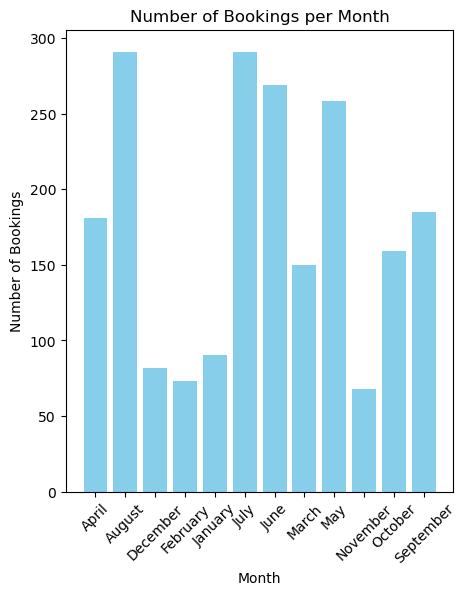

In [105]:
import matplotlib.pyplot as plt

bookings_per_month = df.groupby('arrival_date_month').size()
months = bookings_per_month.index
plt.figure(figsize=(5, 6))
plt.bar(months, bookings_per_month, color='skyblue')
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


In [ ]:
## Intrepretation: 
##The months of May, June, July and August are seeing a surge in bookings. The pricing strategies should be done based on the season

### Is there a relationship between lead time and the likelihood of a booking being cancelled?

In [106]:
# Relationship between Lead Time and Cancellations
lead_time_cancellations = df.groupby('lead_time')['is_canceled'].mean()
lead_time_cancellations

lead_time
0      0.023392
1      0.014085
2      0.172414
3      0.040000
4      0.222222
         ...   
451    0.000000
462    0.000000
476    0.000000
504    0.000000
542    0.000000
Name: is_canceled, Length: 263, dtype: float64

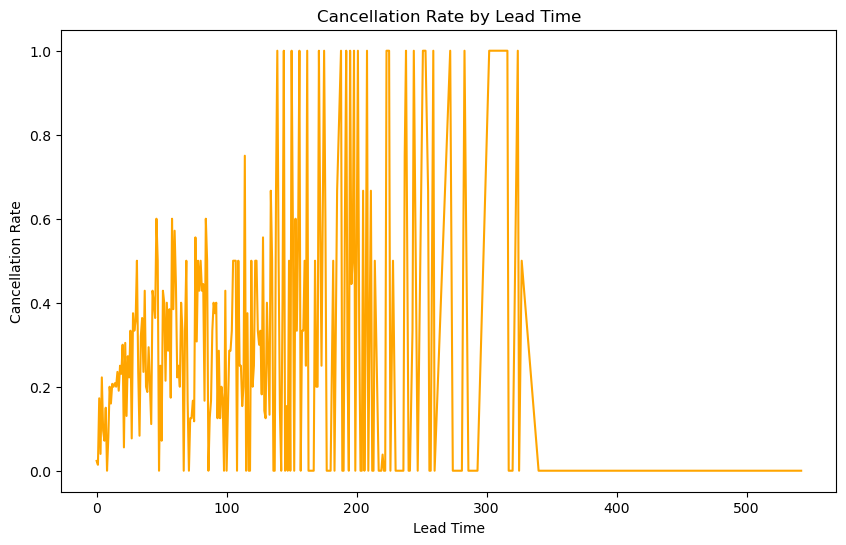

In [107]:
import seaborn as sns

lead_time_cancellations = df.groupby('lead_time')['is_canceled'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=lead_time_cancellations.index, y=lead_time_cancellations.values, color='orange')
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate')
plt.show()

In [ ]:
##Intrepretation
##There is correlation between lead time and cancellation
##as lead time increases chances of cancellation are higher

### How do booking patterns vary by month, week, and day of the week?

In [108]:
# Variation by Month/Week/Day
bookings_per_day = df.groupby('arrival_date_day_of_month').size()
bookings_per_day

arrival_date_day_of_month
1      60
2      96
3      81
4      65
5      75
6      43
7      67
8      83
9      83
10     52
11     75
12    101
13     76
14     44
15     66
16     68
17     54
18     58
19     93
20     59
21     71
22     95
23     56
24     49
25     64
26     77
27     59
28     81
29     62
30     57
31     27
dtype: int64

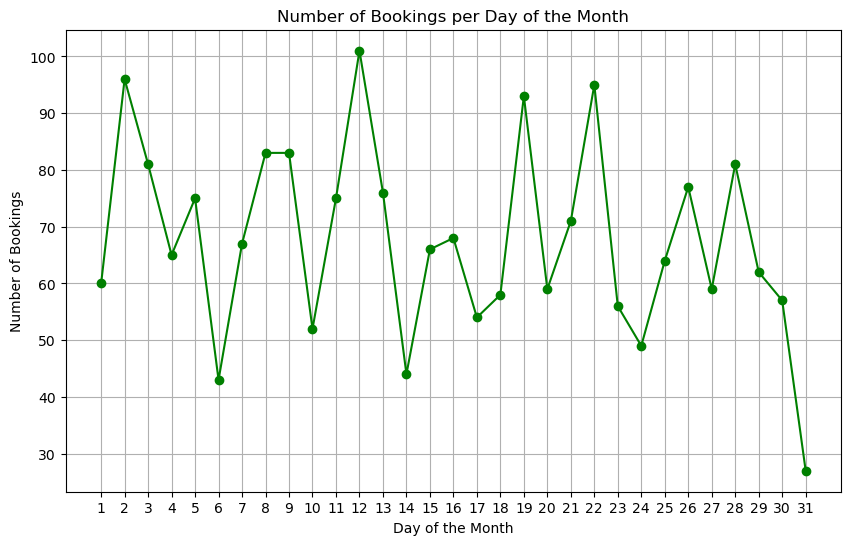

In [63]:
bookings_per_day = df.groupby('arrival_date_day_of_month').size()
days = bookings_per_day.index
plt.figure(figsize=(10, 6))
plt.plot(days, bookings_per_day, marker='o', color='green')
plt.title('Number of Bookings per Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()

In [ ]:
#Intrepretation
#The beginning and mid of the month are seeing a surge in bookings, whereas end of the month is usually low in business

### Task 3: Booking Cancellation Analysis

### What factors influence booking cancellations?

In [64]:
# Factors Influencing Cancellations
correlation_matrix = df.corr()
correlation_matrix

C:\Users\Admin\AppData\Local\Temp\ipykernel_15948\2557908302.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.139926           0.177728   
lead_time                          0.139926   1.000000           0.173740   
arrival_date_year                  0.177728   0.173740           1.000000   
arrival_date_week_number          -0.009932   0.053707          -0.462857   
arrival_date_day_of_month         -0.025284   0.028203           0.007734   
stays_in_weekend_nights            0.082658   0.131117          -0.024865   
stays_in_week_nights               0.096881   0.079721          -0.041018   
adults                             0.072950   0.081802           0.089931   
children                           0.087265   0.014282           0.042824   
babies                            -0.030012   0.017254          -0.017049   
is_repeated_guest                 -0.041772  -0.075789           0.039461   
previous_cancellations                  NaN        NaN                NaN   
previous_bookings_not_canceled    -0.011895  -0.041399           0.014449   
booking_changes                   -0.057613   0.064401           0.042358   
agent                             -0.148546  -0.046119           0.009483   
company                                 NaN   0.364390           0.159421   
days_in_waiting_list              -0.060892   0.193602          -0.063070   
adr                                0.138885  -0.090323           0.198320   
required_car_parking_spaces       -0.150999  -0.091532          -0.087766   
total_of_special_requests         -0.144737   0.120182           0.112196   

                                arrival_date_week_number  \
is_canceled                                    -0.009932   
lead_time                                       0.053707   
arrival_date_year                              -0.462857   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.114554   
stays_in_weekend_nights                        -0.003751   
stays_in_week_nights                            0.056393   
adults                                          0.025739   
children                                        0.028408   
babies                                         -0.014981   
is_repeated_guest                              -0.037379   
previous_cancellations                               NaN   
previous_bookings_not_canceled                  0.002669   
booking_changes                                -0.009898   
agent                                          -0.000629   
company                                         0.174285   
days_in_waiting_list                            0.027465   
adr                                             0.149927   
required_car_parking_spaces                     0.047316   
total_of_special_requests                       0.014845   

                                arrival_date_day_of_month  \
is_canceled                                     -0.025284   
lead_time                                        0.028203   
arrival_date_year                                0.007734   
arrival_date_week_number                         0.114554   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.030071   
stays_in_week_nights                            -0.005310   
adults                                           0.064032   
children                                         0.039259   
babies                                          -0.024743   
is_repeated_guest                                0.011824   
previous_cancellations                                NaN   
previous_bookings_not_canceled                   0.023554   
booking_changes                                  0.020468   
agent                                           -0.016164   
company                                          0.587312   
days_in_waiting_list                             0.074036   
adr                                              0.0816

In [65]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Select correlation of 'is_canceled' with other variables
cancel_correlation = correlation_matrix['is_canceled'].sort_values(ascending=False)

# Print factors with high correlation
print(cancel_correlation)


is_canceled                       1.000000
arrival_date_year                 0.177728
lead_time                         0.139926
adr                               0.138885
stays_in_week_nights              0.096881
children                          0.087265
stays_in_weekend_nights           0.082658
adults                            0.072950
arrival_date_week_number         -0.009932
previous_bookings_not_canceled   -0.011895
arrival_date_day_of_month        -0.025284
babies                           -0.030012
is_repeated_guest                -0.041772
booking_changes                  -0.057613
days_in_waiting_list             -0.060892
total_of_special_requests        -0.144737
agent                            -0.148546
required_car_parking_spaces      -0.150999
previous_cancellations                 NaN
company                                NaN
Name: is_canceled, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_15948\4276947598.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
##Intrepretation
#TO understand the cancellation trend correlation matrix is generated
#Lead time and ADR are having positive correlation with cancellation
#where as factors like parking spaces, agent bookings, special request bookings are negetively correlated

### Are there specific trends or patterns in cancellations over time?

In [66]:
# Trends Over Time
cancellations_over_time = df.groupby('reservation_status_date')['is_canceled'].sum()
cancellations_over_time

reservation_status_date
01-01-2016    1
01-01-2017    0
01-02-2017    0
01-03-2016    1
01-03-2017    4
             ..
31-08-2016    2
31-10-2015    0
31-10-2016    2
31-12-2015    0
31-12-2016    0
Name: is_canceled, Length: 628, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_15948\3236222215.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


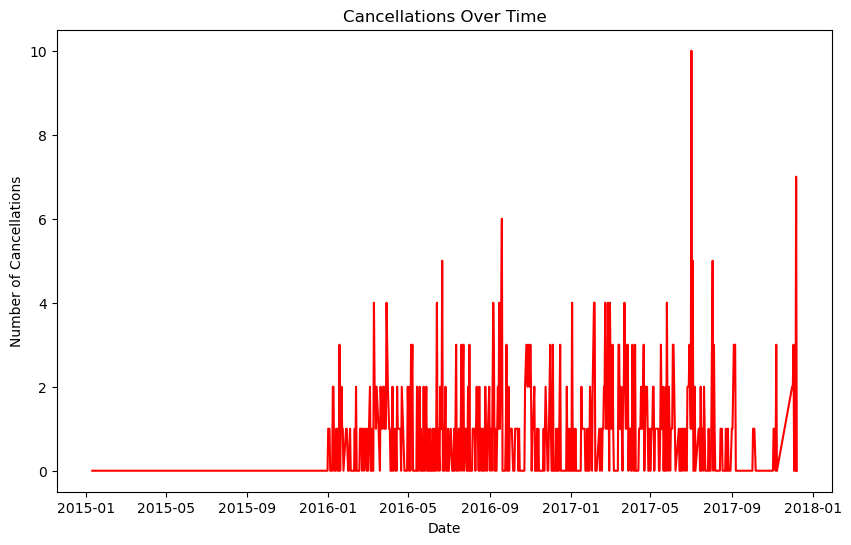

In [67]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Group by date and sum cancellations
cancellations_over_time = df.groupby('reservation_status_date')['is_canceled'].sum()

# Plot cancellations over time
plt.figure(figsize=(10, 6))
plt.plot(cancellations_over_time.index, cancellations_over_time.values, color='red')
plt.title('Cancellations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cancellations')
plt.show()


In [ ]:
#Intrepretation
#There is spike in cancellation between may 2017 to September 2017
#also the cancellation seem to increase during the months where bookings are higher

### Can we identify high-risk bookings that are more likely to be cancelled?

In [68]:
# High-Risk Bookings
high_risk_bookings = df[df['is_canceled'] == 1]
high_risk_bookings

hotel  is_canceled  lead_time  arrival_date_year  \
28    Resort Hotel            1         44               2016   
29    Resort Hotel            1         54               2016   
30    Resort Hotel            1         46               2016   
31    Resort Hotel            1         18               2016   
32    Resort Hotel            1         18               2016   
...            ...          ...        ...                ...   
967     City Hotel            1         33               2017   
968     City Hotel            1        305               2017   
969     City Hotel            1         47               2017   
970     City Hotel            1         68               2017   
1701    City Hotel            1         31               2017   

     arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
28                  May                        19                          6   
29                  May                        20                         13   
30                  May                        22                         22   
31                  May                        22                         27   
32                  May                        22                         27   
...                 ...                       ...                        ...   
967              August                        35                         27   
968              August                        35                         28   
969              August                        35                         30   
970              August                        35                         31   
1701               July                        29                         16   

      stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
28                          2                     3       2  ...   
29                          0                     1       2  ...   
30                          1                     0       1  ...   
31                          0                     2       2  ...   
32                          0                     2       2  ...   
...                       ...                   ...     ...  ...   
967                         2                     1       3  ...   
968                         1                     2       2  ...   
969                         0                     2       3  ...   
970                         0                     2       2  ...   
1701                        2                     0       1  ...   

      deposit_type  agent company days_in_waiting_list customer_type    adr  \
28      No Deposit  240.0     NaN                    0     Transient   95.0   
29      No Deposit  240.0     NaN                    0     Transient   86.0   
30      No Deposit  240.0     NaN                    0     Transient   90.0   
31      No Deposit  240.0     NaN                    0     Transient  139.0   
32      No Deposit  240.0     NaN                    0     Transient  145.0   
...            ...    ...     ...                  ...           ...    ...   
967     No Deposit    9.0     NaN                    0     Transient  223.0   
968     No Deposit    9.0     NaN                    0     Transient  107.1   
969     No Deposit    9.0     NaN                    0     Transient  210.0   
970     No Deposit    9.0     NaN                    0     Transient  129.0   
1701    No Deposit    NaN     NaN                    0     Transient  135.0   

      required_car_parking_spaces  total_of_special_requests  \
28                              0                          0   
29                              0                          0   
30                              0                          0   
31                              0                          1   
32                              0                          1   
...                           ...                        ...   
967                             0                        

In [69]:
# Cancellation rate by 'room_type' and 'market_segment'
cancel_rate = df.groupby(['reserved_room_type', 'market_segment'])['is_canceled'].mean().sort_values(ascending=False)
print(cancel_rate)

reserved_room_type  market_segment
F                   Online TA         0.478261
B                   Online TA         0.448276
D                   Online TA         0.356913
E                   Online TA         0.347368
A                   Online TA         0.295238
H                   Online TA         0.285714
E                   Offline TA/TO     0.187500
G                   Online TA         0.171429
C                   Direct            0.166667
F                   Direct            0.150000
H                   Direct            0.142857
D                   Direct            0.135135
C                   Online TA         0.125000
A                   Direct            0.112676
G                   Direct            0.111111
E                   Direct            0.109091
A                   Offline TA/TO     0.008850
F                   Offline TA/TO     0.000000
G                   Corporate         0.000000
A                   Aviation          0.000000
D                   Offli

In [ ]:
#intrepretation
#online TA bookings are seeing a high rate of cancellation

### Task 4: Customer Behavioral Segmentation

### Are there distinct patterns in the lead time, special requests, or room preferences for different customer segments

In [75]:
# Calculate the average lead time, total special requests, and room preferences for each customer segment
segment_patterns = df.groupby('customer_type').agg({
    'lead_time': 'mean',
    'total_of_special_requests': 'mean',
    'reserved_room_type': lambda x: x.mode()[0]})

# Display the segment patterns
print(segment_patterns)


                  lead_time  total_of_special_requests reserved_room_type
customer_type                                                            
Contract          38.157895                   1.421053                  A
Group             61.333333                   0.400000                  A
Transient         67.893078                   0.773776                  A
Transient-Party  138.384615                   0.685315                  A


In [ ]:
#Intrepretation
#most of the customers prefer Room type A
#contract type see the least lead time with most special request where as Transient party have te highest lead time with least special reuest

### Which marketing channels are most effective for reaching specific customer segments?

In [73]:
# Calculate the count of bookings for each combination of distribution channel and customer segment
marketing_channel = df.groupby(['distribution_channel', 'customer_type']).size().reset_index(name='count')

# Pivot the DataFrame to have distribution channels as columns and customer segments as rows
marketing_channel_pivot = marketing_channel.pivot_table(index='customer_type', columns='distribution_channel', values='count', fill_value=0)

# Calculate the total number of bookings for each customer segment
total_bookings_by_segment = marketing_channel_pivot.sum(axis=1)

marketing_channel_percentage = marketing_channel_pivot.div(total_bookings_by_segment, axis=0)

# Identify the most effective marketing channel for each customer segment
most_effective_channel = marketing_channel_percentage.idxmax(axis=1)

# Print the most effective marketing channel for each customer segment
print("Most effective marketing channel for each customer segment:")
print(most_effective_channel)

Most effective marketing channel for each customer segment:
customer_type
Contract           TA/TO
Group              TA/TO
Transient          TA/TO
Transient-Party    TA/TO
dtype: object


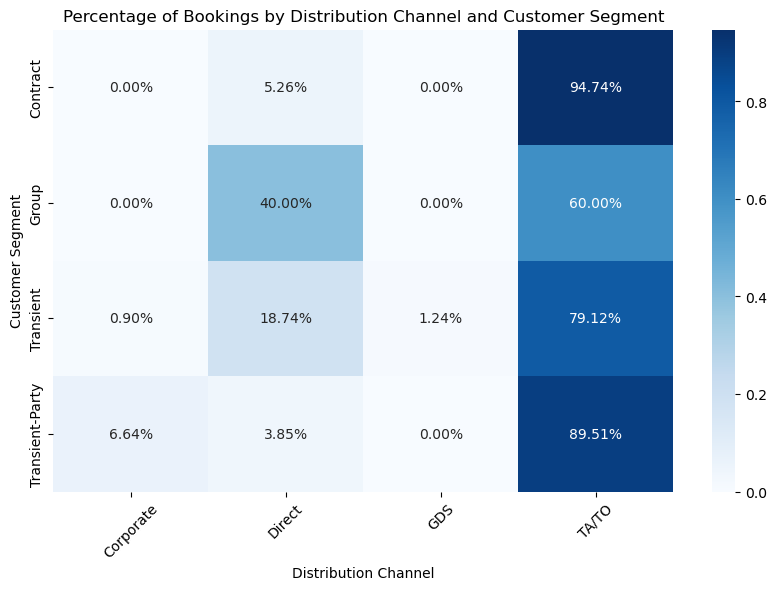

In [74]:
import seaborn as sns

# Calculate the count of bookings for each combination of distribution channel and customer segment
marketing_channel = df.groupby(['distribution_channel', 'customer_type']).size().reset_index(name='count')

# Pivot the DataFrame to have distribution channels as columns and customer segments as rows
marketing_channel_pivot = marketing_channel.pivot_table(index='customer_type', columns='distribution_channel', values='count', fill_value=0)

# Calculate the total number of bookings for each customer segment
total_bookings_by_segment = marketing_channel_pivot.sum(axis=1)

marketing_channel_percentage = marketing_channel_pivot.div(total_bookings_by_segment, axis=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(marketing_channel_percentage, annot=True, cmap='Blues', fmt=".2%", cbar=True)
plt.title('Percentage of Bookings by Distribution Channel and Customer Segment')
plt.xlabel('Distribution Channel')
plt.ylabel('Customer Segment')
plt.xticks(rotation=45)
plt.show()

In [ ]:
##Intrepretation
#TA/TO is found to be the most effective distribution channel

### How can marketing strategies be customized to resonate with specific customer segments, considering factors such as previous cancellations, booking lead time, and special requests?


### Segmentation

In [76]:
from sklearn.cluster import KMeans

# Segmentation based on lead time and total special requests
X = df[['lead_time', 'total_of_special_requests']]

# Adjust the number of clusters based on the number of samples
n_clusters = min(3, len(X))  # Set the number of clusters to a maximum of 3 
kmeans = KMeans(n_clusters=n_clusters)
df['customer_type'] = kmeans.fit_predict(X)
print(df['customer_type'])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0       1
1       1
2       1
3       1
4       1
       ..
2092    1
2093    0
2094    2
2095    0
2096    0
Name: customer_type, Length: 2097, dtype: int32


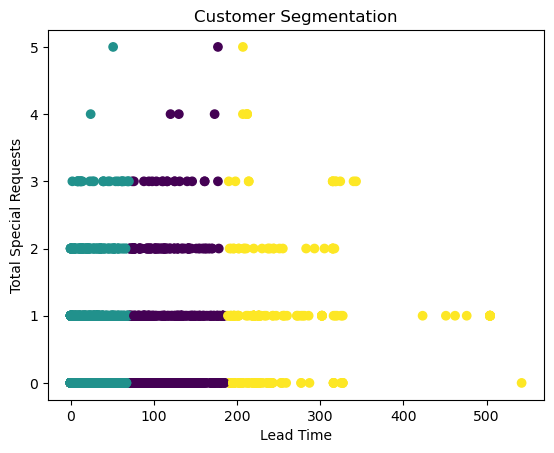

In [77]:
import matplotlib.pyplot as plt

plt.scatter(df['lead_time'], df['total_of_special_requests'], c=df['customer_type'], cmap='viridis')
plt.xlabel('Lead Time')
plt.ylabel('Total Special Requests')
plt.title('Customer Segmentation')
plt.show()

### PART 2

### Task 1: Revenue Management

### How does the Average Daily Rate (ADR) vary over time?

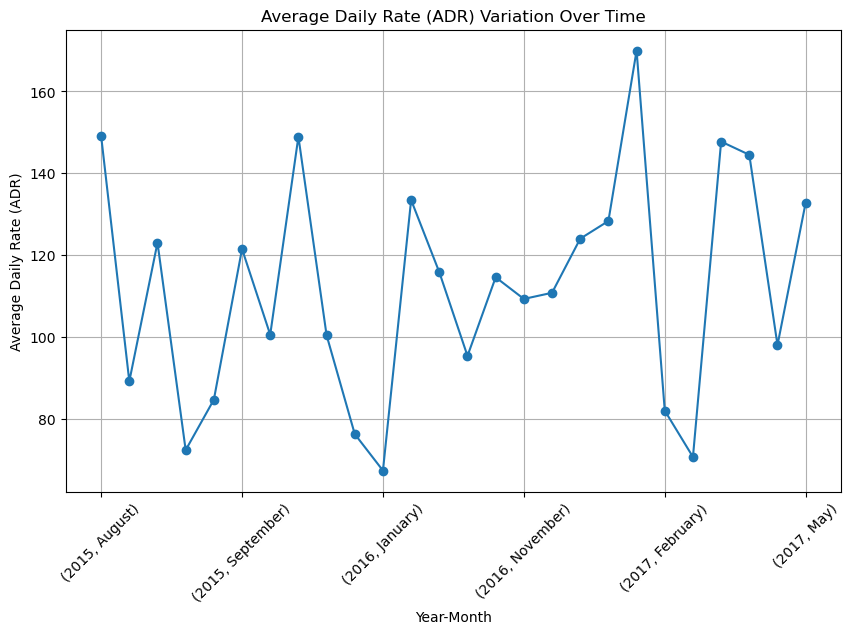

In [78]:
# Average Daily Rate (ADR) Variation Over Time
plt.figure(figsize=(10, 6))
df.groupby(['arrival_date_year', 'arrival_date_month'])['adr'].mean().plot(marker='o')
plt.title('Average Daily Rate (ADR) Variation Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
#intrepretation
#The period of Nov 2016 to March 2017has seen the highest spike and the lowest dip in ADR

### Can we identify pricing strategies that maximize revenue?

### Are there specific room types associated with higher ADR?

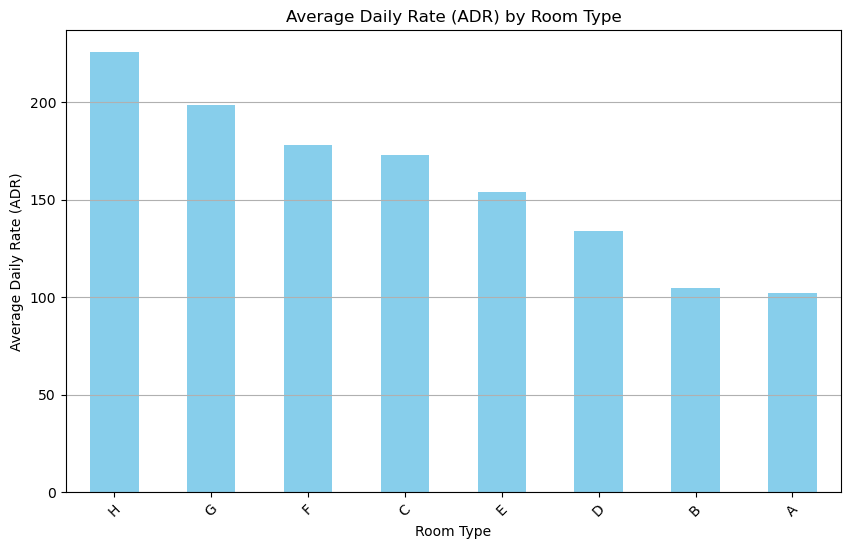

In [79]:
# Group data by reserved_room_type and calculate average ADR
room_type_adr = df.groupby('reserved_room_type')['adr'].mean().sort_values(ascending=False)

# Plot ADR for each room type
plt.figure(figsize=(10, 6))
room_type_adr.plot(kind='bar', color='skyblue')
plt.title('Average Daily Rate (ADR) by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
#Intrepretation
#H type rooms have seen the highest ADR while A type room is having the least average ADR

### Task 2: Operational Efficiency

### what is the effectiveness of different booking distribution channels?

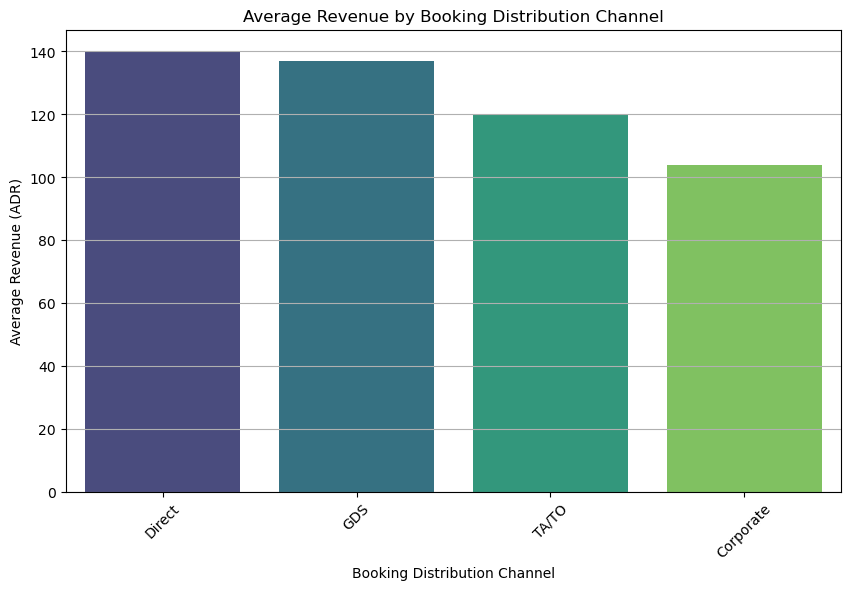

In [80]:

# Group data by booking distribution channel and calculate average revenue
channel_revenue = df.groupby('distribution_channel')['adr'].mean().sort_values(ascending=False)

# Plot average revenue by booking distribution channel
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_revenue.index, y=channel_revenue.values, palette='viridis')
plt.title('Average Revenue by Booking Distribution Channel')
plt.xlabel('Booking Distribution Channel')
plt.ylabel('Average Revenue (ADR)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
#Intrepretation
#Direct bookings is found to be giving the most revenue while corporate is found to give the least, which may be due to the additional discounts

### How do booking changes impact hotel operations?

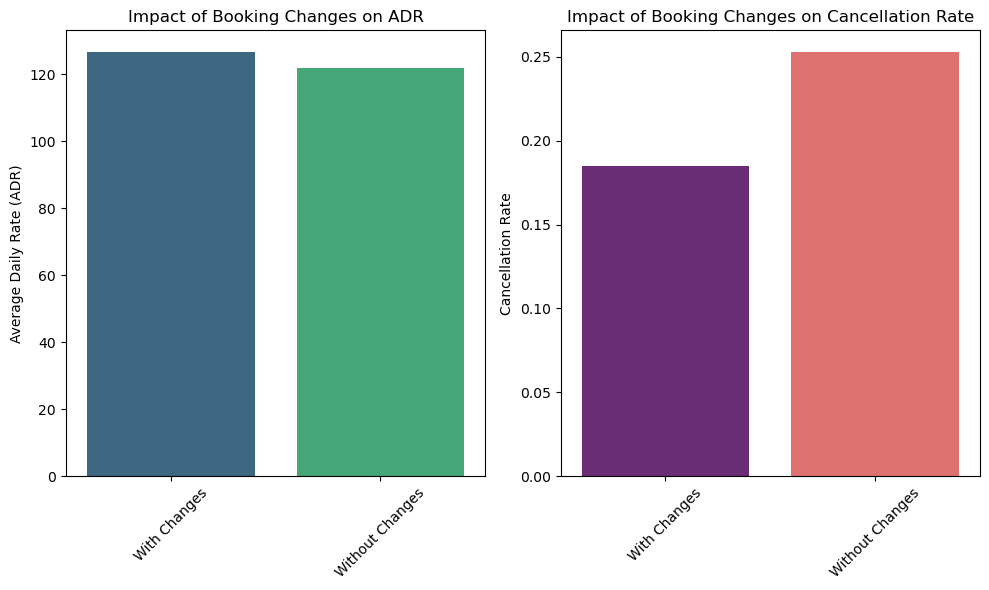

In [81]:
data = df[['booking_changes', 'adr', 'is_canceled']]

# Calculate the average daily rate (ADR) for bookings with and without changes
average_adr_with_changes = data[data['booking_changes'] > 0]['adr'].mean()
average_adr_without_changes = data[data['booking_changes'] == 0]['adr'].mean()

# Calculate the cancellation rate for bookings with and without changes
cancellation_rate_with_changes = data[data['booking_changes'] > 0]['is_canceled'].mean()
cancellation_rate_without_changes = data[data['booking_changes'] == 0]['is_canceled'].mean()

# Visualize the impact of booking changes on ADR and cancellation rate
plt.figure(figsize=(10, 6))

# Average Daily Rate (ADR)
plt.subplot(1, 2, 1)
sns.barplot(x=['With Changes', 'Without Changes'], y=[average_adr_with_changes, average_adr_without_changes], palette='viridis')
plt.title('Impact of Booking Changes on ADR')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)

# Cancellation Rate
plt.subplot(1, 2, 2)
sns.barplot(x=['With Changes', 'Without Changes'], y=[cancellation_rate_with_changes, cancellation_rate_without_changes], palette='magma')
plt.title('Impact of Booking Changes on Cancellation Rate')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
#Intrepreation
#Changes is booking not having much impact in ADR but is found to have direct impact on cancellation rates

### Is there a correlation between the duration a booking remains on the waiting list and the likelihood of cancellation?

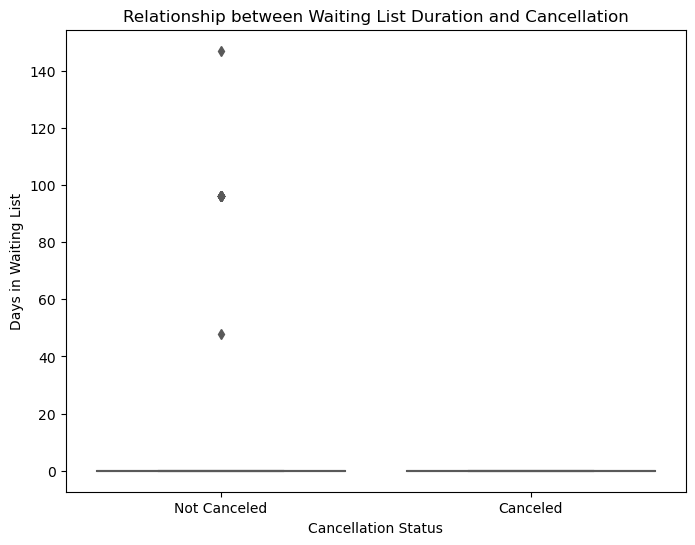

Correlation Coefficient: -0.06089201752421644


In [82]:
# Select relevant columns for analysis
data = df[['days_in_waiting_list', 'is_canceled']]

# Calculate the correlation coefficient
correlation_coefficient = data['days_in_waiting_list'].corr(data['is_canceled'])

# Visualize the relationship between waiting list duration and cancellation status
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_canceled', y='days_in_waiting_list', data=data, palette='Set2')
plt.title('Relationship between Waiting List Duration and Cancellation')
plt.xlabel('Cancellation Status')
plt.ylabel('Days in Waiting List')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

print("Correlation Coefficient:", correlation_coefficient)


In [ ]:
#Intrepretation
#days in waiting list and cancellation status have a slight negetive correlation

### Task 3: Loyalty Programs and Repeat Business

### What is the behavior of repeated guests with respect to their nature of stay?/

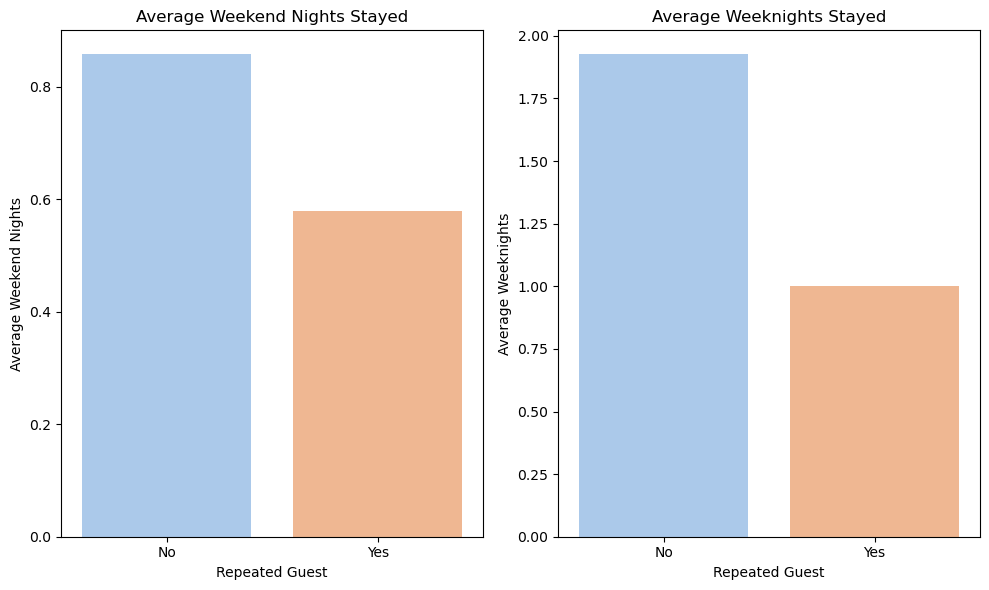

In [86]:
# Select relevant columns for analysis
data = df[['is_repeated_guest', 'stays_in_weekend_nights', 'stays_in_week_nights']]

# Group the data by 'is_repeated_guest' and calculate aggregate statistics
grouped_data = data.groupby('is_repeated_guest').mean().reset_index()

# Visualize the behavior of repeated guests with respect to their nature of stay
plt.figure(figsize=(10, 6))

# Bar plot for average weekend nights stayed
plt.subplot(1, 2, 1)
sns.barplot(x='is_repeated_guest', y='stays_in_weekend_nights', data=grouped_data, palette='pastel')
plt.title('Average Weekend Nights Stayed')
plt.xlabel('Repeated Guest')
plt.ylabel('Average Weekend Nights')
plt.xticks([0, 1], ['No', 'Yes'])

# Bar plot for average weeknights stayed
plt.subplot(1, 2, 2)
sns.barplot(x='is_repeated_guest', y='stays_in_week_nights', data=grouped_data, palette='pastel')
plt.title('Average Weeknights Stayed')
plt.xlabel('Repeated Guest')
plt.ylabel('Average Weeknights')
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()


In [ ]:
#intrepretation
#More number of repeated customers are found to stay in weekend rather than week days

### How does the success of loyalty programs relate to the accommodation of special requests from customers?

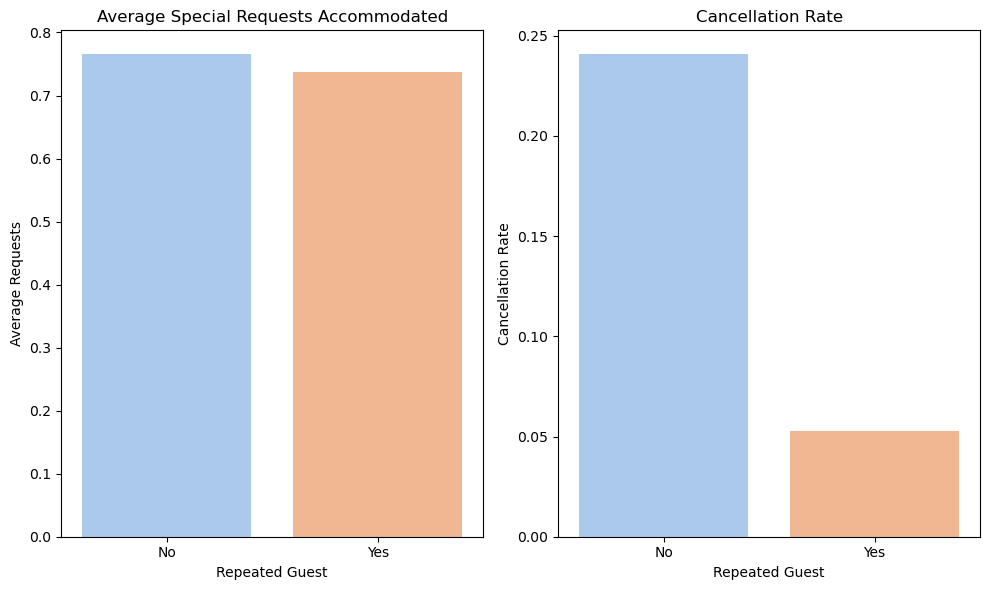

In [83]:
# Select relevant columns for analysis
data = df[['is_repeated_guest', 'total_of_special_requests', 'is_canceled']]

# Group the data by 'is_repeated_guest' and calculate aggregate statistics
grouped_data = data.groupby('is_repeated_guest').agg({
    'total_of_special_requests': 'mean',
    'is_canceled': 'mean'
}).reset_index()

# Visualize the relationship between loyalty program membership and accommodation of special requests
plt.figure(figsize=(10, 6))

# Average number of special requests accommodated
plt.subplot(1, 2, 1)
sns.barplot(x='is_repeated_guest', y='total_of_special_requests', data=grouped_data, palette='pastel')
plt.title('Average Special Requests Accommodated')
plt.xlabel('Repeated Guest')
plt.ylabel('Average Requests')
plt.xticks([0, 1], ['No', 'Yes'])

# Cancellation Rate
plt.subplot(1, 2, 2)
sns.barplot(x='is_repeated_guest', y='is_canceled', data=grouped_data, palette='pastel')
plt.title('Cancellation Rate')
plt.xlabel('Repeated Guest')
plt.ylabel('Cancellation Rate')
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()


In [ ]:
#Intrepretation
#cancellation ratesare lower for repeated customers, so loyalty program is effective

### What factors contribute to repeat business? Also, what is the distribution of lead time for repeated and non-repeated guests

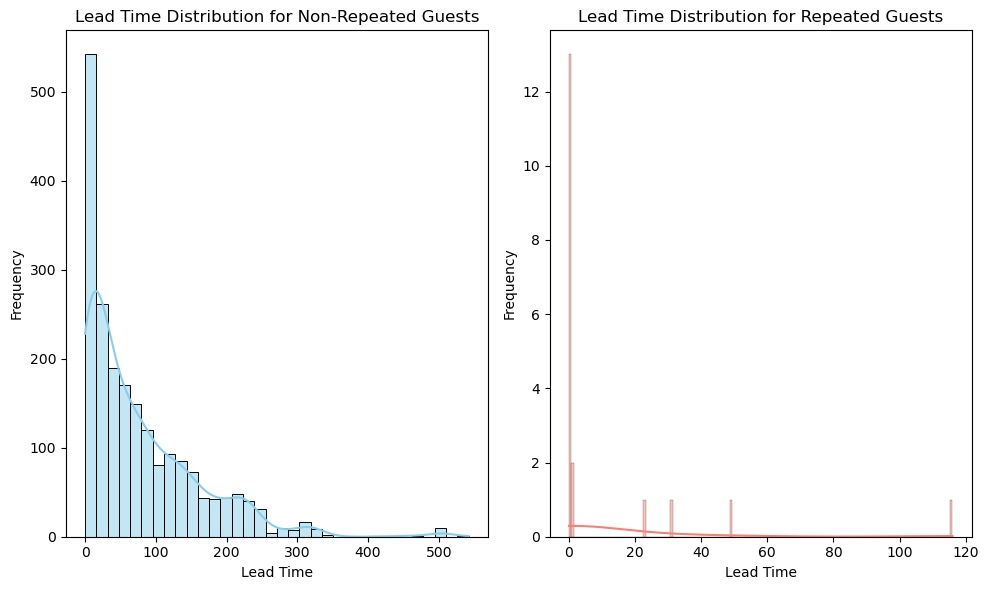

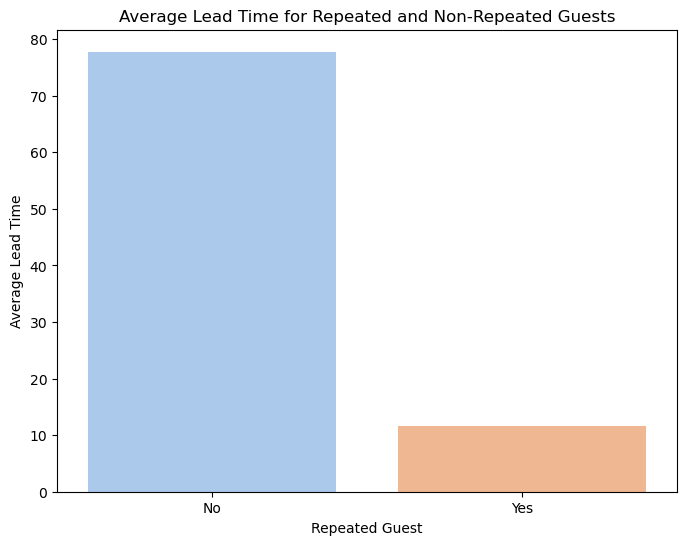

In [84]:
# Select relevant columns for analysis
data = df[['is_repeated_guest', 'lead_time']]

# Group the data by 'is_repeated_guest' and calculate aggregate statistics
grouped_data = data.groupby('is_repeated_guest').agg({
    'lead_time': 'mean'
}).reset_index()

# Visualize the distribution of lead time
plt.figure(figsize=(10, 6))

# Histogram of lead time for non-repeated guests
plt.subplot(1, 2, 1)
sns.histplot(data[data['is_repeated_guest'] == 0]['lead_time'], kde=True, color='skyblue')
plt.title('Lead Time Distribution for Non-Repeated Guests')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')

# Histogram of lead time for repeated guests
plt.subplot(1, 2, 2)
sns.histplot(data[data['is_repeated_guest'] == 1]['lead_time'], kde=True, color='salmon')
plt.title('Lead Time Distribution for Repeated Guests')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualize factors contributing to repeat business
plt.figure(figsize=(8, 6))
sns.barplot(x='is_repeated_guest', y='lead_time', data=grouped_data, palette='pastel')
plt.title('Average Lead Time for Repeated and Non-Repeated Guests')
plt.xlabel('Repeated Guest')
plt.ylabel('Average Lead Time')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [ ]:
#Intrepretation
#Average Lead time is less for repeated customers

### How does the success of loyalty programs relate to the accommodation of special requests from customers?

### What factors contribute to repeat business? Also, what is the distribution of lead time for repeated and non-repeated guests?

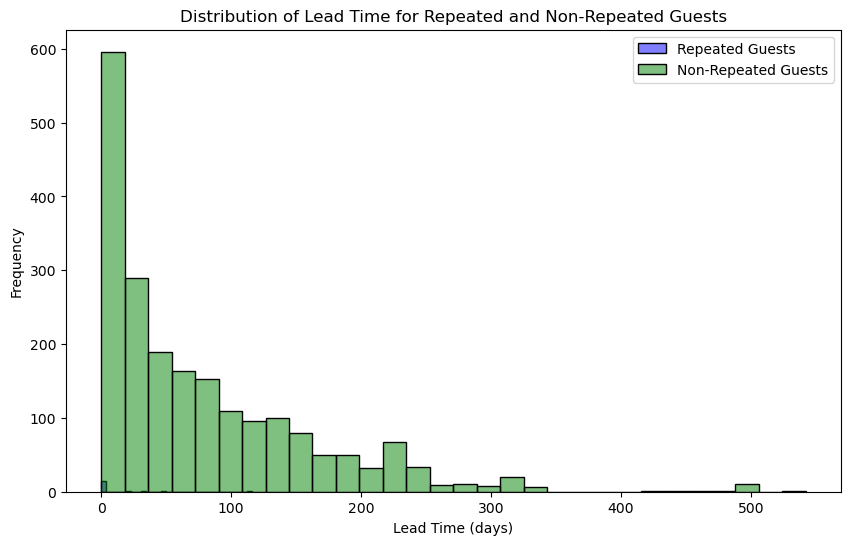

In [90]:
# Filter data for repeated and non-repeated guests
repeated_guests = df[df['is_repeated_guest'] == 1]
non_repeated_guests = df[df['is_repeated_guest'] == 0]

# Plot the distribution of lead time for repeated and non-repeated guests
plt.figure(figsize=(10, 6))
sns.histplot(repeated_guests['lead_time'], bins=30, color='blue', alpha=0.5, label='Repeated Guests')
sns.histplot(non_repeated_guests['lead_time'], bins=30, color='green', alpha=0.5, label='Non-Repeated Guests')
plt.title('Distribution of Lead Time for Repeated and Non-Repeated Guests')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### PART 3

### Task 1: Customer Satisfaction

### What is the distribution of the number and types of special requests made by guests?

Summary Statistics for Total Number of Special Requests:
count    2097.000000
mean        0.764902
std         0.828608
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: total_of_special_requests, dtype: float64


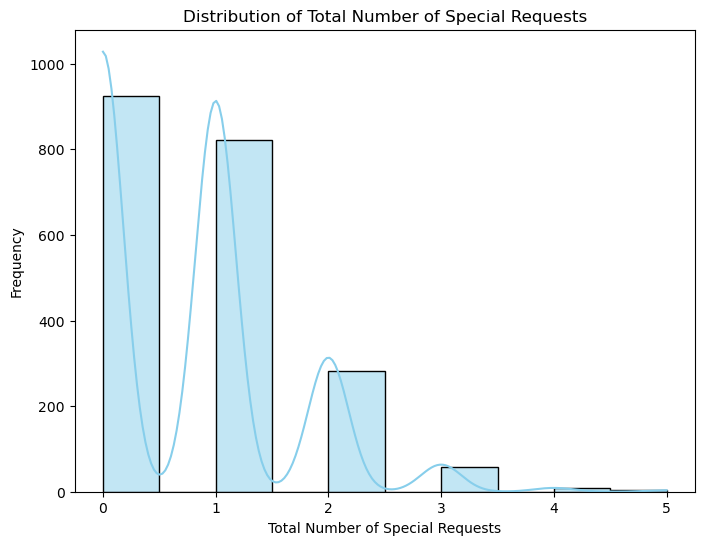

In [91]:
special_requests = df['total_of_special_requests']

# Calculate summary statistics
print("Summary Statistics for Total Number of Special Requests:")
print(special_requests.describe())

# Visualize the distribution of the total number of special requests
plt.figure(figsize=(8, 6))
sns.histplot(special_requests, bins=10, kde=True, color='skyblue')
plt.title('Distribution of Total Number of Special Requests')
plt.xlabel('Total Number of Special Requests')
plt.ylabel('Frequency')
plt.show()


### Is there any relation between special requests made by customers and the average daily rate? Additionally, explore customer preferences and expectations for different room types.

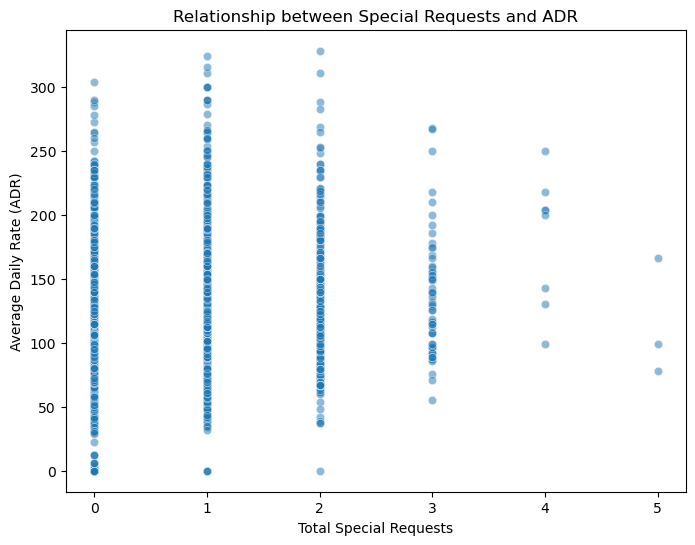

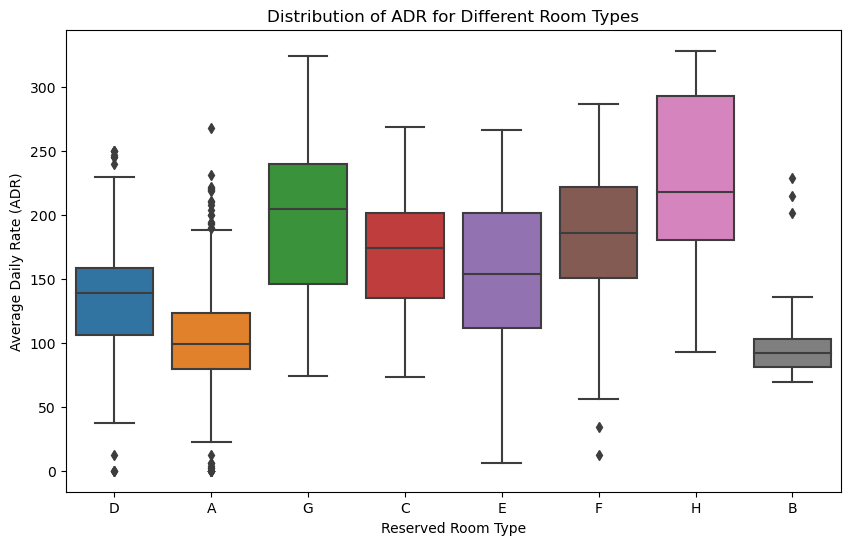

In [92]:
# Relationship between Special Requests and ADR
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_of_special_requests', y='adr', data=df, alpha=0.5)
plt.title('Relationship between Special Requests and ADR')
plt.xlabel('Total Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# Customer Preferences for Different Room Types
plt.figure(figsize=(10, 6))
sns.boxplot(x='reserved_room_type', y='adr', data=df)
plt.title('Distribution of ADR for Different Room Types')
plt.xlabel('Reserved Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

### Task 2: Marketing and Sales Optimization

### Which marketing channels and market segments contribute the most to successful bookings?

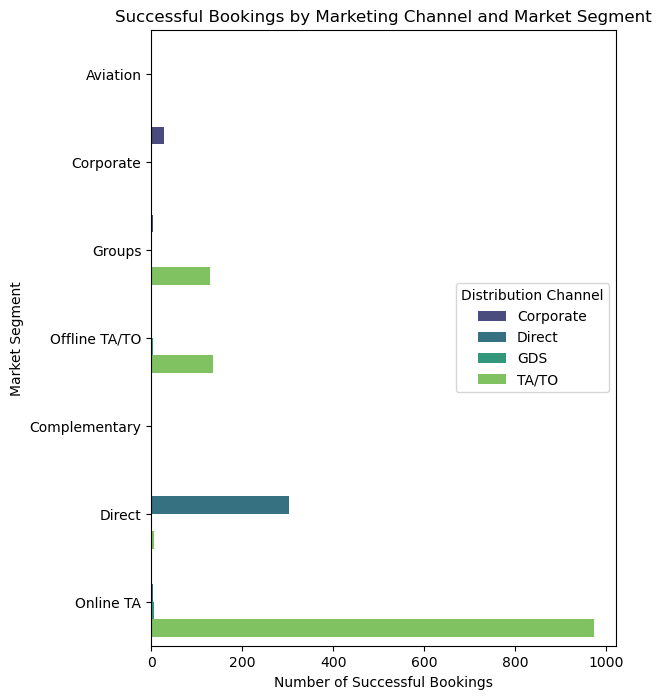

In [94]:
successful_bookings = df[df['is_canceled'] == 0]

# Group by distribution channel and market segment, and count successful bookings
booking_counts = successful_bookings.groupby(['distribution_channel', 'market_segment']).size().reset_index(name='booking_count')

# Plotting
plt.figure(figsize=(6, 8))
sns.barplot(x='booking_count', y='market_segment', hue='distribution_channel', data=booking_counts, palette='viridis')
plt.title('Successful Bookings by Marketing Channel and Market Segment')
plt.xlabel('Number of Successful Bookings')
plt.ylabel('Market Segment')
plt.legend(title='Distribution Channel')
plt.show()


### Which amenities or services have the highest impact on the average daily rate (ADR)?

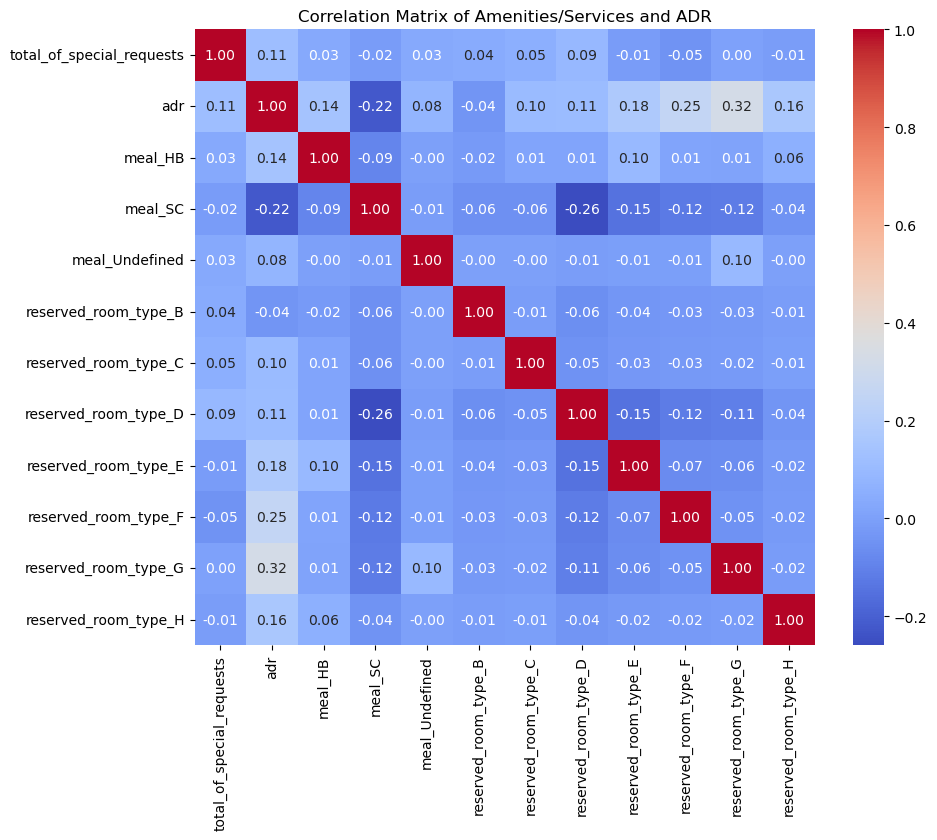

In [95]:
data = df[['meal', 'reserved_room_type', 'total_of_special_requests', 'adr']]

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['meal', 'reserved_room_type'], drop_first=True)

# Compute correlation matrix
correlation_matrix = data.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Amenities/Services and ADR')
plt.show()


### Linear regression

In [96]:
from sklearn.linear_model import LinearRegression

# Prepare X (features) and y (target)
X = data.drop(columns=['adr'])
y = data['adr']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

                      Feature  Coefficient
10       reserved_room_type_H   119.466443
3              meal_Undefined   106.672982
9        reserved_room_type_G    93.737454
8        reserved_room_type_F    75.110290
5        reserved_room_type_C    66.111283
7        reserved_room_type_E    49.375373
6        reserved_room_type_D    29.587542
1                     meal_HB    28.675374
0   total_of_special_requests     6.371307
4        reserved_room_type_B     0.326404
2                     meal_SC    -1.561129


### What is the distribution of bookings across various distribution channels?

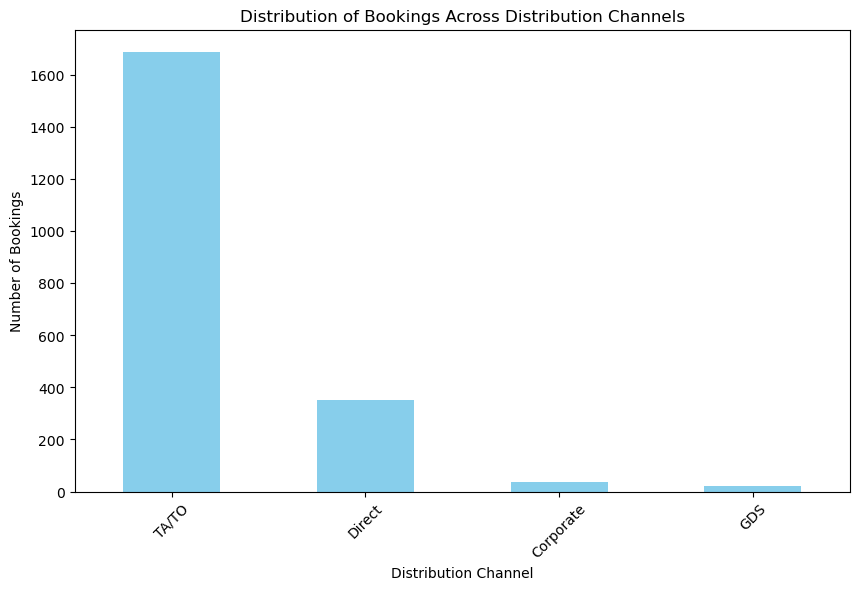

In [97]:
# Group the data by distribution channel and count the number of bookings in each channel
distribution_counts = df['distribution_channel'].value_counts()

# Plot the distribution of bookings across distribution channels
plt.figure(figsize=(10, 6))
distribution_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bookings Across Distribution Channels')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()